In [3]:
import torch
import torch.nn.functional as F

In [5]:
# Softmax
z = torch.FloatTensor([1, 2, 3])

In [6]:
hypothesis = F.softmax(z, dim = 0)
hypothesis

tensor([0.0900, 0.2447, 0.6652])

In [8]:
# 위의 tensor[0] => 0.0900 은 이렇게 나온 수다!
import numpy as np
np.exp(1.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.09003057317038046

In [9]:
# 위의 tensor[2] => 0.6652 은 이렇게 나온 수다!
np.exp(3.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.6652409557748219

In [10]:
hypothesis.sum()    # 다 더하면 1이 나옴.

tensor(1.)

In [11]:
# 즉, softmax는 데이터의 크기를 비율로 표현해 주는 것.
# 즉, 항상 딥러닝의 output 은 1이 됨.
# 일반적인 비율보다, 내가 강조하고자 하는 것이 더 강조되는 방법.(?)

In [12]:
# MNIST 
# 손글씨 인식 데이터.

In [20]:
# !pip install torchvision

In [45]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import numpy as np
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [56]:
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

training_epoch = 15
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

In [57]:
mnist_train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [58]:
image, label = mnist_train[0]
print(image.shape, label)  # torch.Size([1, 28, 28]) 7 => 흑백이고(색이 1개라는 뜻), 28*28 사이즈의 데이터라는 것. 라벨은 7(이데이터는 7이다)

torch.Size([1, 28, 28]) 5


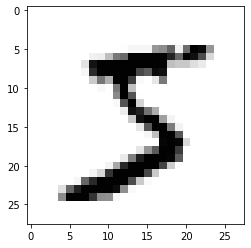

In [59]:
plt.imshow(image.reshape(28, 28), cmap = 'gray')

img = np.reshape(image, [28, 28])
plt.imshow(img, cmap = 'Greys')

In [60]:
linear = nn.Linear(28*28, 10, bias = True)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [62]:
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, y in data_loader:
        X = X.view(-1, 28*28)
        y = y
        
        hypothesis = linear(X)
        cost = criterion(hypothesis, y)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
    print('Epoch:', '%04d' %(epoch+1), 'cost=', "{:.9f}".format(avg_cost))
print("Finished")

Epoch: 0001 cost= 0.535434186
Epoch: 0002 cost= 0.359146148
Epoch: 0003 cost= 0.330968559
Epoch: 0004 cost= 0.316469282
Epoch: 0005 cost= 0.307094812
Epoch: 0006 cost= 0.300075173
Epoch: 0007 cost= 0.294968098
Epoch: 0008 cost= 0.290739387
Epoch: 0009 cost= 0.287224740
Epoch: 0010 cost= 0.284415275
Epoch: 0011 cost= 0.281792760
Epoch: 0012 cost= 0.279732764
Epoch: 0013 cost= 0.277808905
Epoch: 0014 cost= 0.275984794
Epoch: 0015 cost= 0.274349213
Finished


acc: 0.880299985408783
Label: 8
Prediction: 8


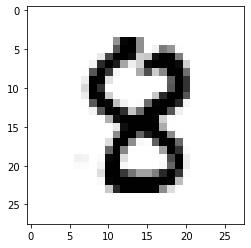

In [67]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("acc:", accuracy.item())
    
    r  = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    y_single_data = mnist_test.test_labels[r:r+1]
    print('Label:', y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction:", torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

In [ ]:
# Neural Network - Deep Learning

In [68]:
# layer 작업
# nn.Linear(784, 10) 
# 784 -> 10 이 사이에 신경망 레이어를 집어넣어주기.
# 784 -> 256 -> 256 -> 10
linear1 = nn.Linear(784, 256, bias = True)
linear2 = nn.Linear(256, 256, bias = True)
linear3 =nn.Linear(256, 10, bias = True)
relu = torch.nn.ReLU()

In [69]:
nn.init.normal_(linear1.weight)
nn.init.normal_(linear2.weight)
nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[ 0.4335,  0.3842, -1.9988,  ...,  1.4347, -1.2613, -0.7798],
        [ 0.9088,  0.9690, -0.3039,  ..., -0.8340,  0.8193, -0.2445],
        [ 1.1548,  0.0426,  0.1177,  ...,  0.1134,  0.2704,  1.7950],
        ...,
        [ 0.3832,  0.5959,  0.8227,  ..., -0.9242, -1.1389, -0.0462],
        [ 0.6624,  1.8003,  0.5956,  ..., -0.2786,  1.4093, -0.9388],
        [-0.3222,  1.9893,  0.3187,  ...,  0.2204, -1.2068,  2.4578]],
       requires_grad=True)

In [70]:
model = nn.Sequential(linear1, relu, linear2, relu, linear3)

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
total_batch = len(data_loader)
train_epochs = 15
batch_size = 100

for epoch in range(train_epochs):
    avg_cost = 0
    for X, y in data_loader:
        X = X.view(-1, 28*28)
        y = y
        optimizer.zero_grad()
        hyp = model(X)
        cost = criterion(hyp, y)
        cost.backward()
        optimizer.step()
        avg_cost += cost/total_batch
    print('Epoch:', '%04d' %(epoch+1), 'cost=', "{:.9f}".format(avg_cost))
print("Finished")

Epoch: 0001 cost= 20.953557968
Epoch: 0002 cost= 13.175374985
Epoch: 0003 cost= 9.053606033
Epoch: 0004 cost= 6.405821800
Epoch: 0005 cost= 4.580871105
Epoch: 0006 cost= 3.376567602
Epoch: 0007 cost= 2.505031586
Epoch: 0008 cost= 1.801648736
Epoch: 0009 cost= 1.378505945
Epoch: 0010 cost= 1.055796862
Epoch: 0011 cost= 0.829579711
Epoch: 0012 cost= 0.696486235
Epoch: 0013 cost= 0.533369303
Epoch: 0014 cost= 0.575403810
Epoch: 0015 cost= 0.467625529
Finished


acc: 0.9491999745368958
Label: 1
Prediction: 1


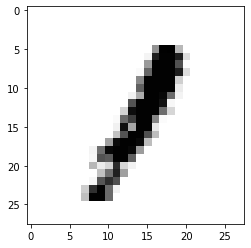

In [78]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(X_test)
    
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("acc:", accuracy.item())
    
    r  = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    y_single_data = mnist_test.test_labels[r:r+1]
    print('Label:', y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction:", torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()